In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/SampleSubmission.csv
/kaggle/input/IdLookupTable.csv
/kaggle/input/training/training.csv
/kaggle/input/test/test.csv


In [3]:
# Reading the training dataset

training = pd.read_csv('/kaggle/input/training/training.csv')
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 31 columns):
left_eye_center_x            7039 non-null float64
left_eye_center_y            7039 non-null float64
right_eye_center_x           7036 non-null float64
right_eye_center_y           7036 non-null float64
left_eye_inner_corner_x      2271 non-null float64
left_eye_inner_corner_y      2271 non-null float64
left_eye_outer_corner_x      2267 non-null float64
left_eye_outer_corner_y      2267 non-null float64
right_eye_inner_corner_x     2268 non-null float64
right_eye_inner_corner_y     2268 non-null float64
right_eye_outer_corner_x     2268 non-null float64
right_eye_outer_corner_y     2268 non-null float64
left_eyebrow_inner_end_x     2270 non-null float64
left_eyebrow_inner_end_y     2270 non-null float64
left_eyebrow_outer_end_x     2225 non-null float64
left_eyebrow_outer_end_y     2225 non-null float64
right_eyebrow_inner_end_x    2270 non-null float64
right_eyebrow_inner_end_y 

In [4]:
#Trying to find the number of null values in the training dataset
training.isnull().sum()

left_eye_center_x              10
left_eye_center_y              10
right_eye_center_x             13
right_eye_center_y             13
left_eye_inner_corner_x      4778
left_eye_inner_corner_y      4778
left_eye_outer_corner_x      4782
left_eye_outer_corner_y      4782
right_eye_inner_corner_x     4781
right_eye_inner_corner_y     4781
right_eye_outer_corner_x     4781
right_eye_outer_corner_y     4781
left_eyebrow_inner_end_x     4779
left_eyebrow_inner_end_y     4779
left_eyebrow_outer_end_x     4824
left_eyebrow_outer_end_y     4824
right_eyebrow_inner_end_x    4779
right_eyebrow_inner_end_y    4779
right_eyebrow_outer_end_x    4813
right_eyebrow_outer_end_y    4813
nose_tip_x                      0
nose_tip_y                      0
mouth_left_corner_x          4780
mouth_left_corner_y          4780
mouth_right_corner_x         4779
mouth_right_corner_y         4779
mouth_center_top_lip_x       4774
mouth_center_top_lip_y       4774
mouth_center_bottom_lip_x      33
mouth_center_b

In [5]:
#Looks like we have lot of null values in the train data. Lets drop all the values which have null value.
training = training.dropna()

In [6]:
training.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2140 entries, 0 to 2283
Data columns (total 31 columns):
left_eye_center_x            2140 non-null float64
left_eye_center_y            2140 non-null float64
right_eye_center_x           2140 non-null float64
right_eye_center_y           2140 non-null float64
left_eye_inner_corner_x      2140 non-null float64
left_eye_inner_corner_y      2140 non-null float64
left_eye_outer_corner_x      2140 non-null float64
left_eye_outer_corner_y      2140 non-null float64
right_eye_inner_corner_x     2140 non-null float64
right_eye_inner_corner_y     2140 non-null float64
right_eye_outer_corner_x     2140 non-null float64
right_eye_outer_corner_y     2140 non-null float64
left_eyebrow_inner_end_x     2140 non-null float64
left_eyebrow_inner_end_y     2140 non-null float64
left_eyebrow_outer_end_x     2140 non-null float64
left_eyebrow_outer_end_y     2140 non-null float64
right_eyebrow_inner_end_x    2140 non-null float64
right_eyebrow_inner_end_y 

In [7]:
#There are total 2140 non-null objects. Lets see the top 5 details of the image dataset.
training.head()

left_eye_center_x  left_eye_center_y  right_eye_center_x  \
0          66.033564          39.002274           30.227008   
1          64.332936          34.970077           29.949277   
2          65.057053          34.909642           30.903789   
3          65.225739          37.261774           32.023096   
4          66.725301          39.621261           32.244810   

   right_eye_center_y  left_eye_inner_corner_x  left_eye_inner_corner_y  \
0           36.421678                59.582075                39.647423   
1           33.448715                58.856170                35.274349   
2           34.909642                59.412000                36.320968   
3           37.261774                60.003339                39.127179   
4           38.042032                58.565890                39.621261   

   left_eye_outer_corner_x  left_eye_outer_corner_y  right_eye_inner_corner_x  \
0                73.130346                39.969997                 36.356571   
1                70.722723                36.187166                 36.034723   
2                70.984421                36.320968                 37.678105   
3                72.314713                38.380967                 37.618643   
4                72.515926                39.884466                 36.982380   

   right_eye_inner_corner_y  ...  nose_tip_y  mouth_left_corner_x  \
0                 37.389402  ...   57.066803            61.195308   
1                 34.361532  ...   55.660936            56.421447   
2                 36.320968  ...   53.538947            60.822947   
3                 38.754115  ...   54.166539            65.598887   
4                 39.094852  ...   64.889521            60.671411   

   mouth_left_corner_y  mouth_right_corner_x  mouth_right_corner_y  \
0            79.970165             28.614496             77.388992   
1            76.352000             35.122383             76.047660   
2            73.014316             33.726316             72.732000   
3            72.703722             37.245496             74.195478   
4            77.523239             31.191755             76.997301   

   mouth_center_top_lip_x  mouth_center_top_lip_y  mouth_center_bottom_lip_x  \
0               43.312602               72.935459                  43.130707   
1               46.684596               70.266553                  45.467915   
2               47.274947               70.191789                  47.274947   
3               50.303165               70.091687                  51.561183   
4               44.962748               73.707387                  44.227141   

   mouth_center_bottom_lip_y  \
0                  84.485774   
1                  85.480170   
2                  78.659368   
3                  78.268383   
4                  86.871166   

                                               Image  
0  238 236 237 238 240 240 239 241 241 243 240 23...  
1  219 215 204 196 204 211 212 200 180 168 178 19...  
2  144 142 159 180 188 188 184 180 167 132 84 59 ...  
3  193 192 193 194 194 194 193 192 168 111 50 12 ...  
4  147 148 160 196 215 214 216 217 219 220 206 18...  

[5 rows x 31 columns]

In [8]:
#We can see that the first 30 columns refers to the points/keypoints for images and last columns refers to the pixel values of the images.

In [9]:
# In order to proceed further we need to seperate the images and the datapoints from the training data.

#Writing a function to seperate the images from the training data
def load_images(image_data):
    images = []
    for idx, sample in image_data.iterrows():  #iterrows used to iterate over the dataframe
        image = np.array(sample['Image'].split(' '), dtype=int)
        image = np.reshape(image, (96,96,1))
        images.append(image)
    images = np.array(images)/255.             #Normalizing the image btw 0 and 1
    return images

#Writing a function to seperate the keypoints from the training data
def load_keypoints(keypoint_data):
    keypoint_data = keypoint_data.drop('Image',axis = 1)
    keypoint_features = []
    for idx, sample_keypoints in keypoint_data.iterrows():
        keypoint_features.append(sample_keypoints)
    keypoint_features = np.array(keypoint_features, dtype = 'float')
    return keypoint_features


clean_train_images =load_images(training)
print("Shape of clean_train_images:", np.shape(clean_train_images))

clean_train_keypoints = load_keypoints(training)
print("Shape of clean_train_keypoints:", np.shape(clean_train_keypoints))


Shape of clean_train_images: (2140, 96, 96, 1)
Shape of clean_train_keypoints: (2140, 30)


In [10]:
#Below is the link for the more usage on iterrows
#https://cmdlinetips.com/2018/12/how-to-loop-through-pandas-rows-or-how-to-iterate-over-pandas-rows/

# Horizontal Flipping of Images

Using TensorFlow backend.


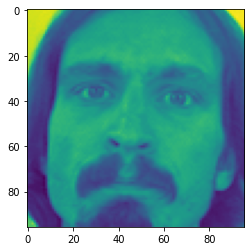

In [11]:
import matplotlib.pyplot as plt
from keras.preprocessing.image import array_to_img, img_to_array, load_img

flipped_images = np.flip(clean_train_images[0], axis=2) 

plt.imshow(array_to_img(flipped_images))

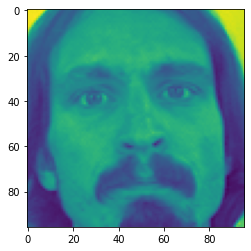

In [12]:
flipped_images = np.flip(clean_train_images[0], axis=1) 

plt.imshow(array_to_img(flipped_images))

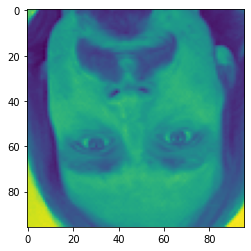

In [13]:
flipped_images = np.flip(clean_train_images[0], axis=0) 

plt.imshow(array_to_img(flipped_images))

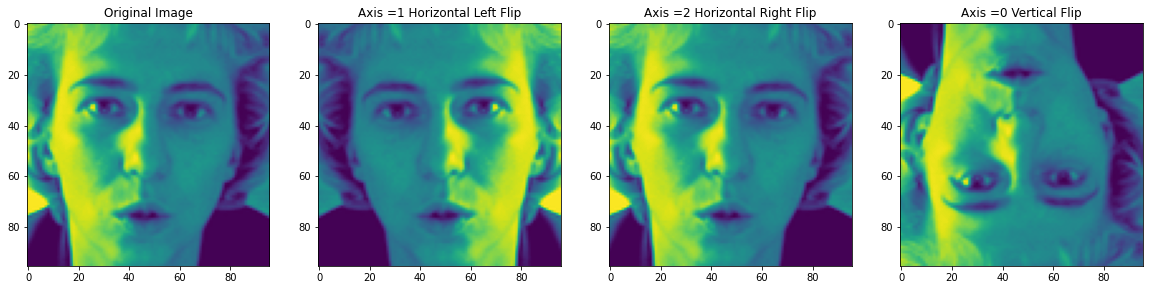

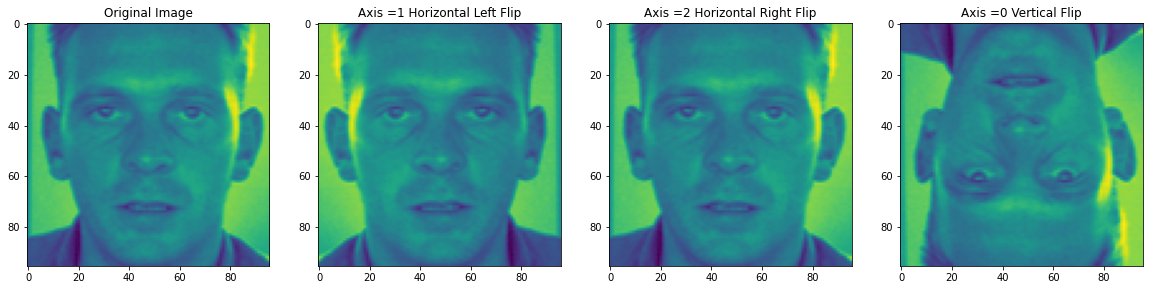

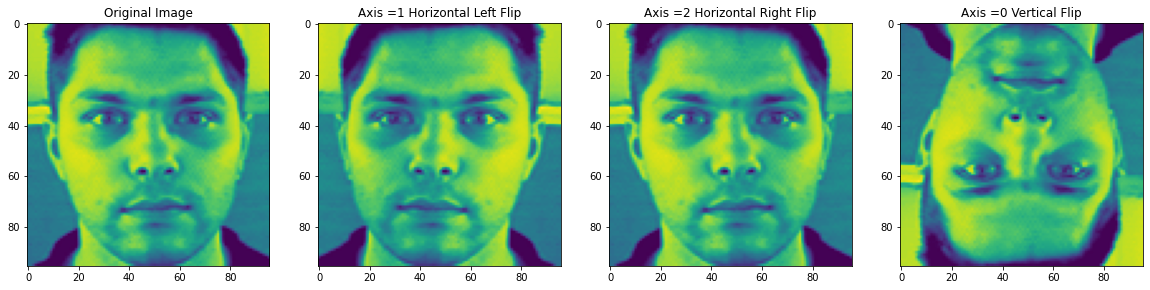

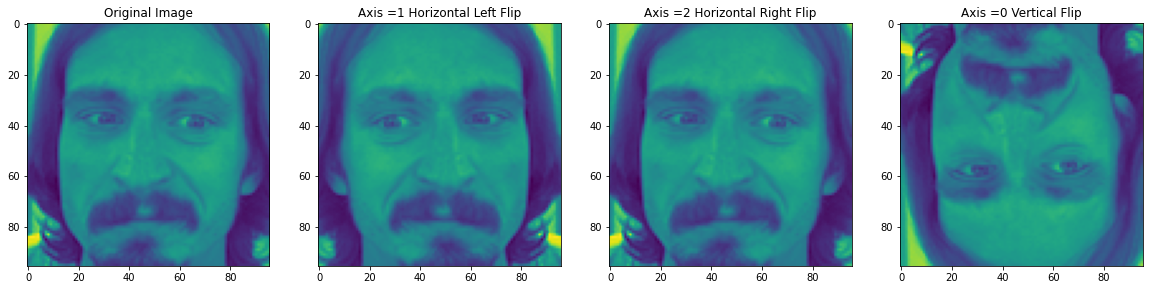

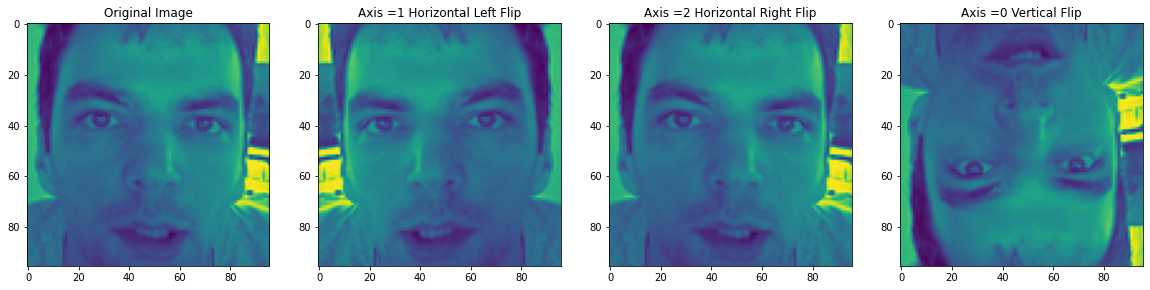

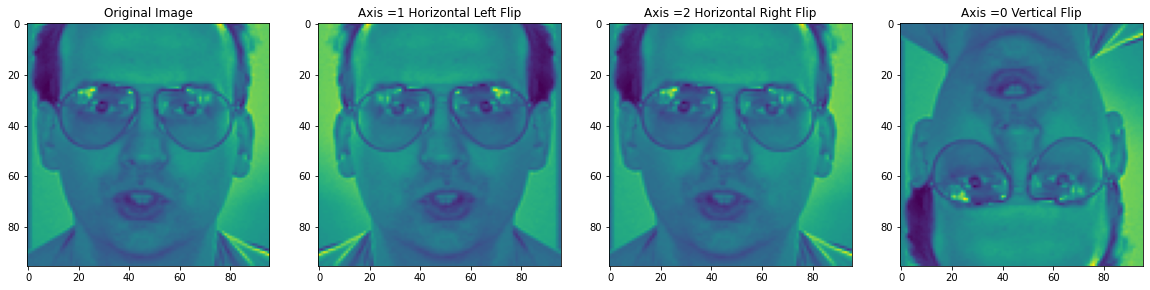

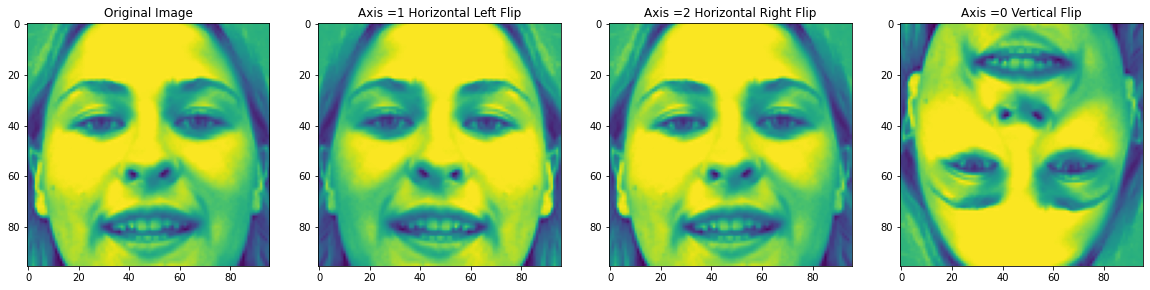

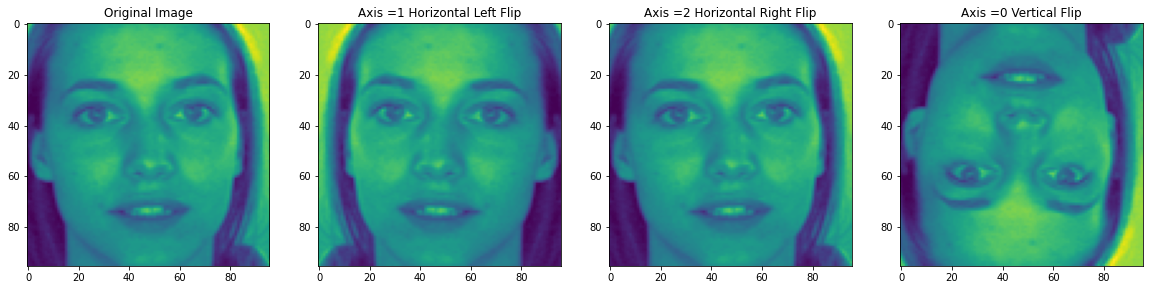

In [14]:
%matplotlib inline


for i in range(1,9):
    fig = plt.figure(figsize=(20,20))
    
    ax0 = fig.add_subplot(3,4,1)
    ax0.set_title("Original Image")
    ax0.imshow(array_to_img(clean_train_images[i]))
    
    flip1 = np.flip(clean_train_images[i], axis=1)
    ax1 = fig.add_subplot(3,4,2)
    ax1.set_title("Axis =1 Horizontal Left Flip")
    ax1.imshow(array_to_img(flip1))
    
    flip2 = np.flip(clean_train_images[i], axis=2)
    ax2 = fig.add_subplot(3,4,3)
    ax2.set_title("Axis =2 Horizontal Right Flip")
    ax2.imshow(array_to_img(flip2))
    
    flip3 = np.flip(clean_train_images[i], axis=0)
    ax3 = fig.add_subplot(3,4,4)
    ax3.set_title("Axis =0 Vertical Flip")
    ax3.imshow(array_to_img(flip3))

In [15]:
#Function for Horizantal flipping of images
def left_right_flip(images, keypoints):
    flipped_keypoints = []
    flipped_images = np.flip(images, axis=2)   # Flip column-wise (axis=2)
    for idx, sample_keypoints in enumerate(keypoints):
        flipped_keypoints.append([96.-coor if idx%2==0 else coor for idx,coor in enumerate(sample_keypoints)])    # Subtract only X co-ordinates of keypoints from 96 for horizontal flipping
    return flipped_images, flipped_keypoints

In [16]:
horizontal_flip = True
if horizontal_flip:
    flipped_train_images, flipped_train_keypoints = left_right_flip(clean_train_images, clean_train_keypoints)
    print("Shape of flipped_train_images:",np.shape(flipped_train_images))
    print("Shape of flipped_train_keypoints:",np.shape(flipped_train_keypoints))

Shape of flipped_train_images: (2140, 96, 96, 1)
Shape of flipped_train_keypoints: (2140, 30)


************************************* Horizontal Flippied Images with Key Points*********************************************


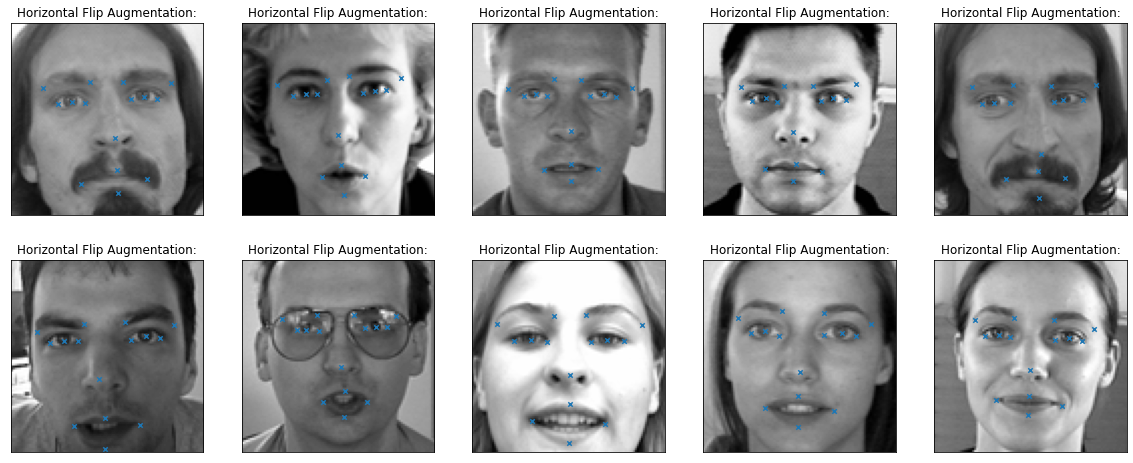

************************************ Original Images with Key Points ********************************************************


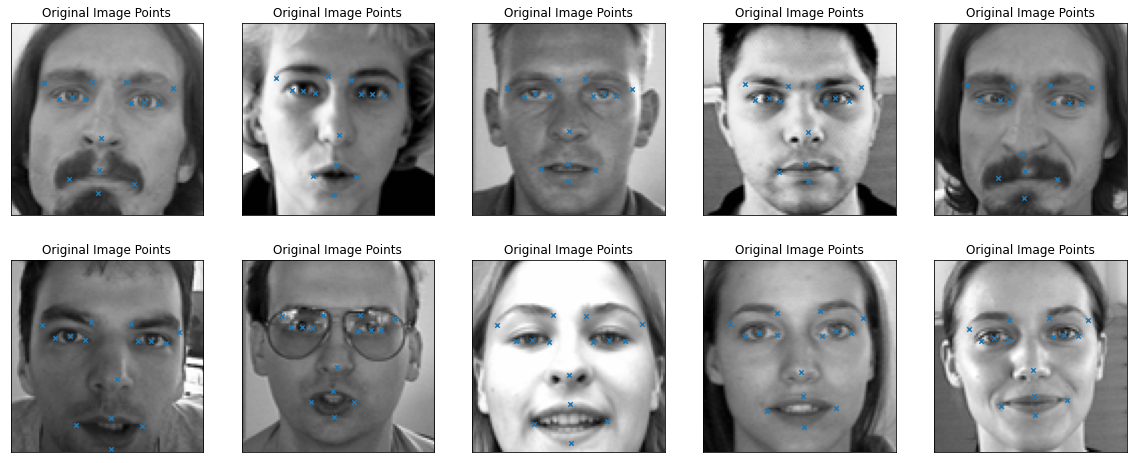

In [17]:
#Let's create a function to plot the image
def plot_sample(image, keypoint, axis, title):
    image = image.reshape(96,96)
    axis.imshow(image, cmap='gray')
    axis.scatter(keypoint[0::2], keypoint[1::2], marker='x', s=20)
    plt.title(title)
    
print("************************************* Horizontal Flippied Images with Key Points*********************************************")
if horizontal_flip:
    fig = plt.figure(figsize=(20,8))
    for i in range(10):
        axis = fig.add_subplot(2, 5, i+1, xticks=[], yticks=[])
        plot_sample(flipped_train_images[i], flipped_train_keypoints[i], axis, "Horizontal Flip Augmentation:")
    plt.show()

print("************************************ Original Images with Key Points ********************************************************")
if horizontal_flip:
    fig = plt.figure(figsize=(20,8))
    for i in range(10):
        axis = fig.add_subplot(2, 5, i+1, xticks=[], yticks=[])
        plot_sample(clean_train_images[i], clean_train_keypoints[i], axis, "Original Image Points")
    plt.show()


# Rotation of Images with Key Points

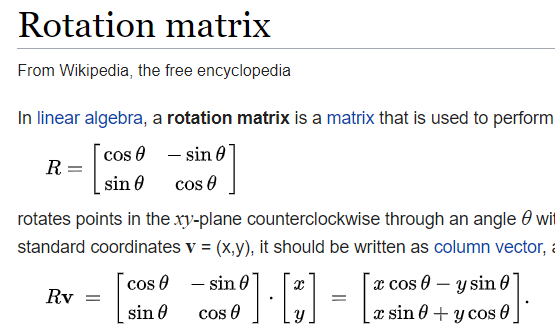

In [18]:
# Above is the formula to get the new co-ordinates from the given co-ordinates with the rotation angle

In [19]:
import cv2
from math import sin, cos, pi


rotation_angles = [12]    # Rotation angle in degrees (includes both clockwise & anti-clockwise rotations)

#Writing a function for Rotation of the Images
def rotate_augmentation(images, keypoints):
    rotated_images = []
    rotated_keypoints = []
    print("Augmenting for angles (in degrees): ")
    
    for angle in rotation_angles:    # Rotation augmentation for a list of angle values
        for angle in [angle,-angle]:
            print(f'{angle}', end='  ')
            M = cv2.getRotationMatrix2D((48,48), angle, 1.0)
            angle_rad = -angle*pi/180.     # Obtain angle in radians from angle in degrees (notice negative sign for change in clockwise vs anti-clockwise directions from conventional rotation to cv2's image rotation)
            
            # For train_images
            for image in images:
                rotated_image = cv2.warpAffine(image, M, (96,96), flags=cv2.INTER_CUBIC)
                rotated_images.append(rotated_image)
            
            # For train_keypoints
            for keypoint in keypoints:
                rotated_keypoint = keypoint - 48.    # Subtract the middle value of the image dimension
                for idx in range(0,len(rotated_keypoint),2):
                    # https://in.mathworks.com/matlabcentral/answers/93554-how-can-i-rotate-a-set-of-points-in-a-plane-by-a-certain-angle-about-an-arbitrary-point
                    rotated_keypoint[idx] = rotated_keypoint[idx]*cos(angle_rad)-rotated_keypoint[idx+1]*sin(angle_rad)
                    rotated_keypoint[idx+1] = rotated_keypoint[idx]*sin(angle_rad)+rotated_keypoint[idx+1]*cos(angle_rad)
                rotated_keypoint += 48.   # Add the earlier subtracted value
                rotated_keypoints.append(rotated_keypoint)
            
    return np.reshape(rotated_images,(-1,96,96,1)), rotated_keypoints

#For more details on the transformation of the images below is the link.
#https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_geometric_transformations/py_geometric_transformations.html



In [20]:
rotation_augmentation = True

if rotation_augmentation:
    rotated_train_images, rotated_train_keypoints = rotate_augmentation(clean_train_images, clean_train_keypoints)
    print("\nShape of rotated_train_images:",np.shape(rotated_train_images))
    print("Shape of rotated_train_keypoints:\n",np.shape(rotated_train_keypoints))

Augmenting for angles (in degrees): 
12  -12  
Shape of rotated_train_images: (4280, 96, 96, 1)
Shape of rotated_train_keypoints:
 (4280, 30)


In [21]:
#Rotation of Kep Points with Images using "imgaug" library. You can find an example on the below link.
#https://github.com/shashidharuppin/Deep-Learning/blob/master/Image%20Augmentation%20Rotation%20with%20Key%20points.ipynb

************************************* Rotationally Flippied Images with Key Points*********************************************


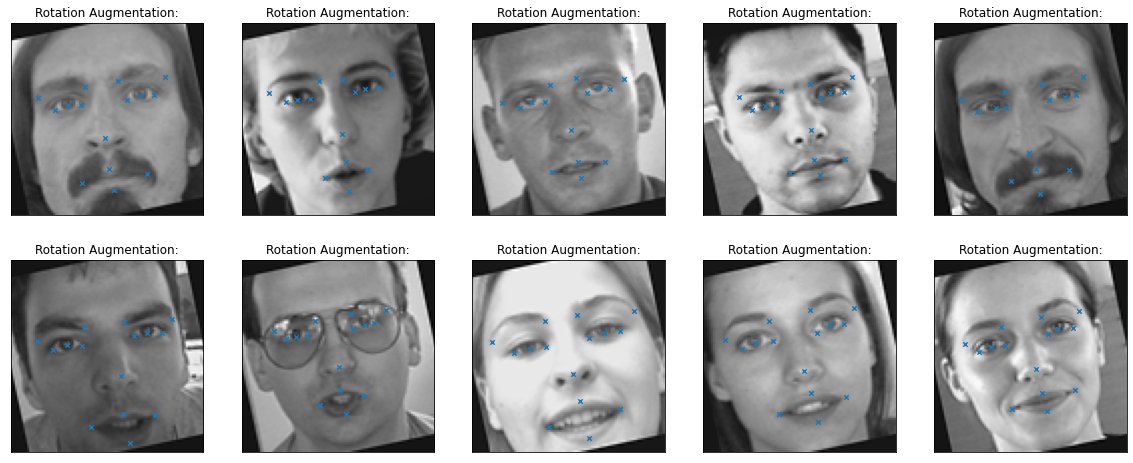

In [22]:
rotation_augmentation = True

print("************************************* Rotationally Flippied Images with Key Points*********************************************")
if rotation_augmentation:
    fig = plt.figure(figsize=(20,8))
    for i in range(10):
        axis = fig.add_subplot(2, 5, i+1, xticks=[], yticks=[])
        plot_sample(rotated_train_images[i], rotated_train_keypoints[i], axis, "Rotation Augmentation:")
    plt.show()

# Changing Brightness of Images 

This would be straight forward. i will discuss various option of altering the image brightness.

In [24]:
#Writing a function for Brightness Alteration using Numpy Clip method
def alter_brightness(images, keypoints):
    altered_brightness_images = []
    inc_brightness_images = np.clip(images*1.2, 0.0, 1.0)    # Increased brightness by a factor of 1.2 & clip any values outside the range of [-1,1]
    dec_brightness_images = np.clip(images*0.6, 0.0, 1.0)    # Decreased brightness by a factor of 0.6 & clip any values outside the range of [-1,1]
    altered_brightness_images.extend(inc_brightness_images)
    altered_brightness_images.extend(dec_brightness_images)
    return altered_brightness_images, np.concatenate((keypoints, keypoints))



In [25]:
brightness_augmentation = True

if brightness_augmentation:
    altered_brightness_train_images, altered_brightness_train_keypoints = alter_brightness(clean_train_images, clean_train_keypoints)
    print("Shape of altered_brightness_train_images:",np.shape(altered_brightness_train_images))
    print("Shape of altered_brightness_train_keypoints:",np.shape(altered_brightness_train_keypoints))

Shape of altered_brightness_train_images: (4280, 96, 96, 1)
Shape of altered_brightness_train_keypoints: (4280, 30)


************************************* Increased Brightness Images with Key Points*********************************************


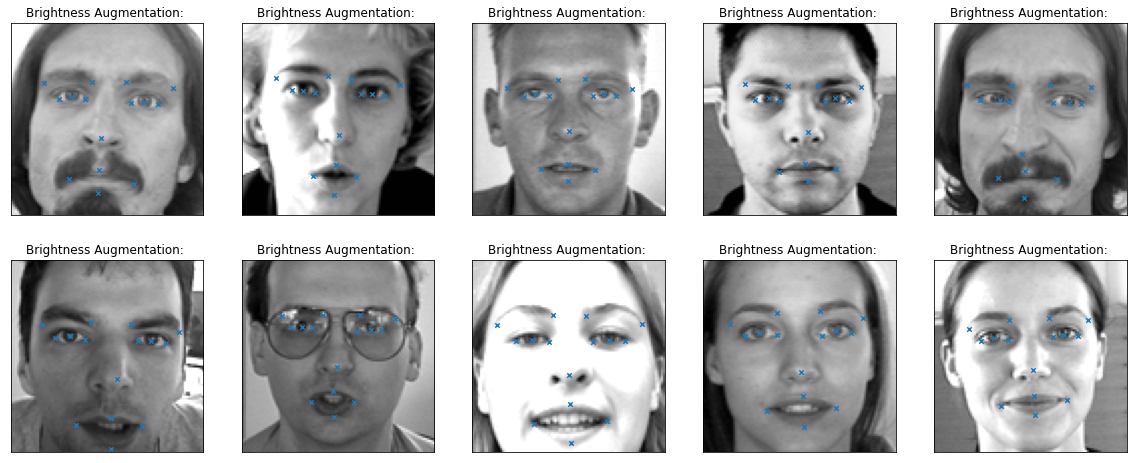

************************************* Decreased Brightness Images with Key Points*********************************************


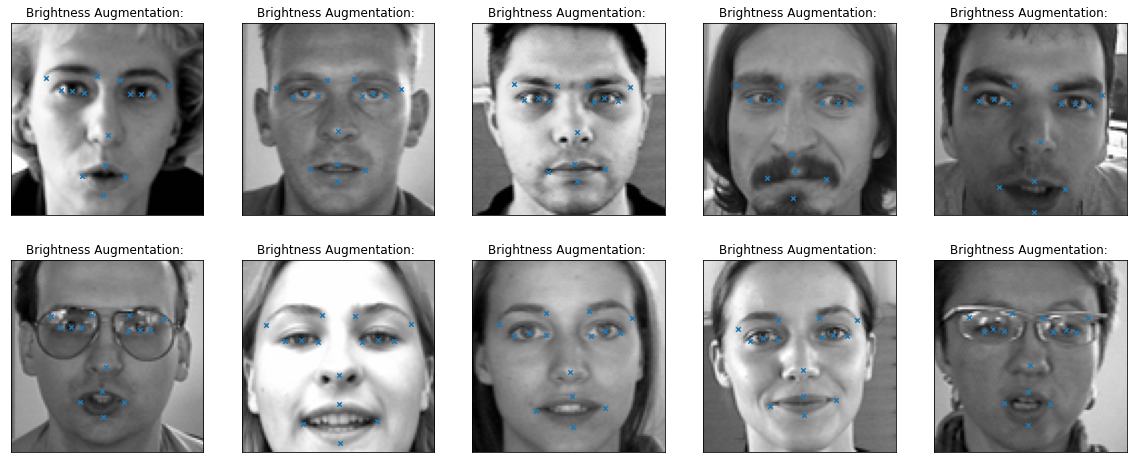

In [28]:
print("************************************* Increased Brightness Images with Key Points*********************************************")
if brightness_augmentation:
    fig = plt.figure(figsize=(20,8))
    for i in range(10):
        axis = fig.add_subplot(2, 5, i+1, xticks=[], yticks=[])
        plot_sample(altered_brightness_train_images[i], altered_brightness_train_keypoints[i], axis, "Brightness Augmentation: ")
    plt.show()
    
print("************************************* Decreased Brightness Images with Key Points*********************************************")
if brightness_augmentation:
    fig = plt.figure(figsize=(20,8))
    for i in range(2141,2151,1):
        axis = fig.add_subplot(2, 5, i-2140, xticks=[], yticks=[])
        plot_sample(altered_brightness_train_images[i], altered_brightness_train_keypoints[i], axis, "Brightness Augmentation: ")
    plt.show()

**Other way of changing the brightness using PIL Library******

In here, factor is a floating-point number that enhances brightness of an Image. It has no length limitation. It has several Values. They are as follows

factor > 1  Brightness of Image increases according to given factor

factor < 1  Brightness of Image decreases according to given factor

and if factor is equal to 1 then Brightness of Image remains same

************************************Increased Brightness Images**********************************************************


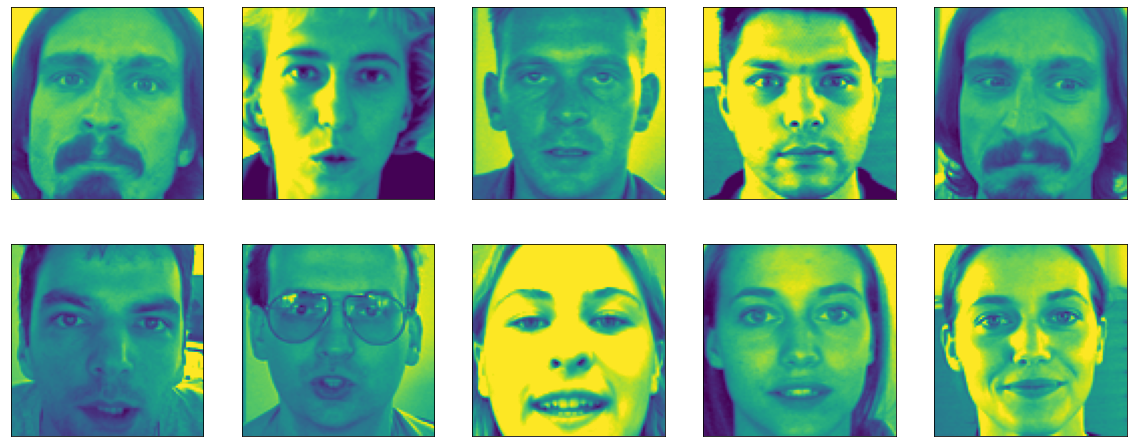

In [34]:
from PIL import Image,ImageEnhance

fig = plt.figure(figsize=(20,8))
print("************************************Increased Brightness Images**********************************************************")
for i in range(10):
    axis = fig.add_subplot(2, 5, i+1, xticks=[], yticks=[])
    img = array_to_img(clean_train_images[i])
    img_brightness_obj=ImageEnhance.Brightness(img)
    factor = 1.2
    enhanced_img=img_brightness_obj.enhance(factor)
    plt.imshow(enhanced_img)
# Facial Keypoints remain the same



************************************Decreased Brightness Images**********************************************************


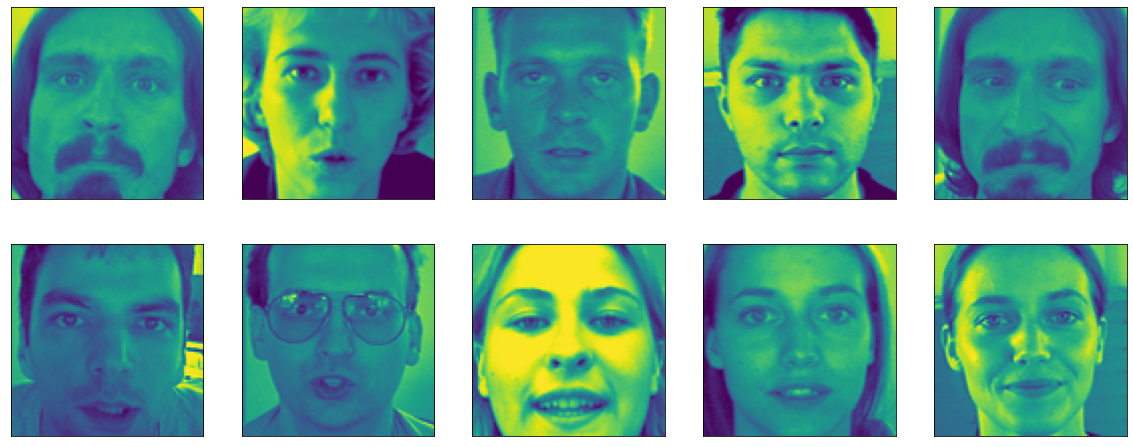

In [36]:
print("************************************Decreased Brightness Images**********************************************************")
fig1 = plt.figure(figsize=(20,8))
for i in range(10):
    axis1 = fig1.add_subplot(2, 5, i+1, xticks=[], yticks=[])
    img = array_to_img(clean_train_images[i])
    img_brightness_obj=ImageEnhance.Brightness(img)
    factor = 0.6
    enhanced_img=img_brightness_obj.enhance(factor)
    plt.imshow(enhanced_img)

# Adding Nosie to the Images

In [39]:
#Writing a function to add noise
def add_noise(images):
    noisy_images = []
    for image in images:
        noisy_image = cv2.add(image, 0.018*np.random.randn(96,96,1))    # Adding random normal noise to the input image & clip the resulting noisy image between [-1,1]
        noisy_images.append(noisy_image.reshape(96,96,1))
    return noisy_images


random_noise_augmentation = True
if random_noise_augmentation:
    noisy_train_images = add_noise(clean_train_images)
    print("Shape of noisy_train_images:",np.shape(noisy_train_images))

Shape of noisy_train_images: (2140, 96, 96, 1)


************************************* Noisy Images with Key Points*********************************************


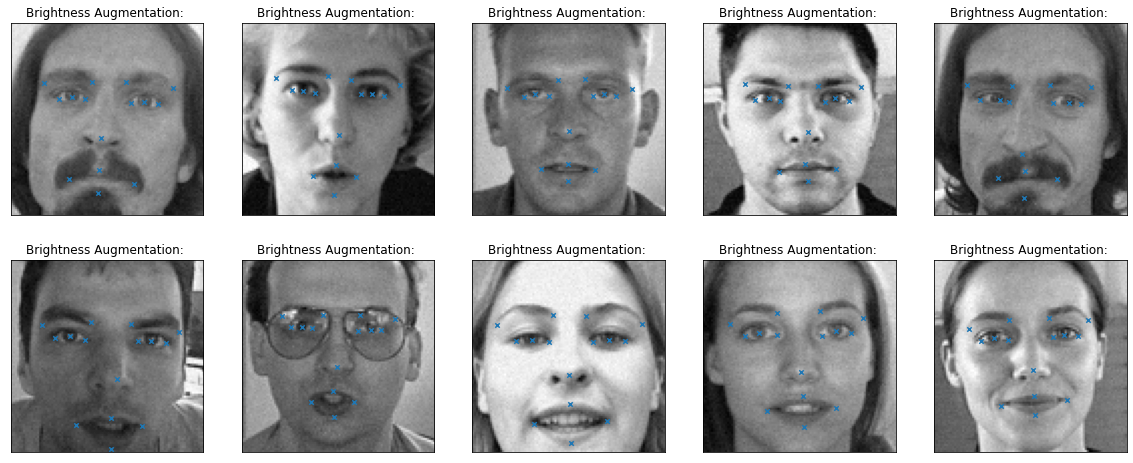

In [40]:
print("************************************* Noisy Images with Key Points*********************************************")
if brightness_augmentation:
    fig = plt.figure(figsize=(20,8))
    for i in range(10):
        axis = fig.add_subplot(2, 5, i+1, xticks=[], yticks=[])
        plot_sample(noisy_train_images[i], clean_train_keypoints[i], axis, "Brightness Augmentation: ")
    plt.show()

**Adding Nosie to image using skimage library**

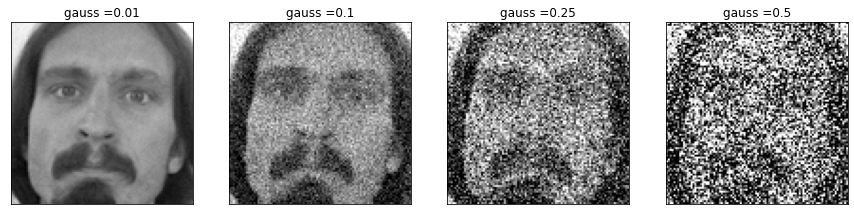

In [69]:
from skimage.util import random_noise
from skimage import data, img_as_float

im = array_to_img(clean_train_images[0])
original = img_as_float(im)

fig = plt.figure(figsize=(15,15))
sigmas = [0.01,0.1,0.25, 0.5]
for i in range(4):  
    noisy = random_noise(original, var=sigmas[i]**2) 
    #plt.subplot(1,4,i+1)
    axis = fig.add_subplot(1, 4, i+1, xticks=[], yticks=[])
    axis.imshow(noisy) 
    plt.title('gauss =' + str(sigmas[i]))
plt.show()

Estimated Gaussian noise standard deviation = 0.15011680869225444


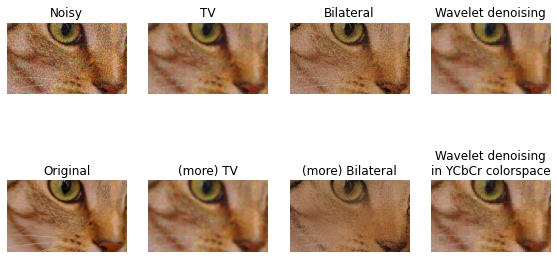

In [70]:
#Various methods under skimage to add noise
from skimage import data, img_as_float
from skimage.util import random_noise
from skimage.restoration import (denoise_tv_chambolle, denoise_bilateral,
                                 denoise_wavelet, estimate_sigma)

original = img_as_float(data.chelsea()[100:250, 50:300])

sigma = 0.155
noisy = random_noise(original, var=sigma**2)

fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(8, 5),
                       sharex=True, sharey=True)

plt.gray()

# Estimate the average noise standard deviation across color channels.
sigma_est = estimate_sigma(noisy, multichannel=True, average_sigmas=True)
# Due to clipping in random_noise, the estimate will be a bit smaller than the
# specified sigma.
print(f"Estimated Gaussian noise standard deviation = {sigma_est}")

ax[0, 0].imshow(noisy)
ax[0, 0].axis('off')
ax[0, 0].set_title('Noisy')
ax[0, 1].imshow(denoise_tv_chambolle(noisy, weight=0.1, multichannel=True))
ax[0, 1].axis('off')
ax[0, 1].set_title('TV')
ax[0, 2].imshow(denoise_bilateral(noisy, sigma_color=0.05, sigma_spatial=15,
                multichannel=True))
ax[0, 2].axis('off')
ax[0, 2].set_title('Bilateral')
ax[0, 3].imshow(denoise_wavelet(noisy, multichannel=True, rescale_sigma=True))
ax[0, 3].axis('off')
ax[0, 3].set_title('Wavelet denoising')

ax[1, 1].imshow(denoise_tv_chambolle(noisy, weight=0.2, multichannel=True))
ax[1, 1].axis('off')
ax[1, 1].set_title('(more) TV')
ax[1, 2].imshow(denoise_bilateral(noisy, sigma_color=0.1, sigma_spatial=15,
                multichannel=True))
ax[1, 2].axis('off')
ax[1, 2].set_title('(more) Bilateral')
ax[1, 3].imshow(denoise_wavelet(noisy, multichannel=True, convert2ycbcr=True,
                                rescale_sigma=True))
ax[1, 3].axis('off')
ax[1, 3].set_title('Wavelet denoising\nin YCbCr colorspace')
ax[1, 0].imshow(original)
ax[1, 0].axis('off')
ax[1, 0].set_title('Original')

fig.tight_layout()

plt.show()

# Shifting of Images Vertical & Horizontal

Below link gives the basic information regarding the translation of images.
https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_geometric_transformations/py_geometric_transformations.html

In [74]:
#Writing a function for shift the image horizontal and verical
pixel_shifts = [12]

def shift_images(images, keypoints):
    shifted_images = []
    shifted_keypoints = []
    
    for shift in pixel_shifts:    # Augmenting over several pixel shift values
        for (shift_x,shift_y) in [(-shift,-shift),(-shift,shift),(shift,-shift),(shift,shift)]:
            M = np.float32([[1,0,shift_x],[0,1,shift_y]])
            
            for image, keypoint in zip(images, keypoints):
                shifted_image = cv2.warpAffine(image, M, (96,96), flags=cv2.INTER_CUBIC)
                shifted_keypoint = np.array([(point+shift_x) if idx%2==0 else (point+shift_y) for idx, point in enumerate(keypoint)])
                
                if np.all(0.0<shifted_keypoint) and np.all(shifted_keypoint<96.0):
                    shifted_images.append(shifted_image.reshape(96,96,1))
                    shifted_keypoints.append(shifted_keypoint)
                    
    shifted_keypoints = np.clip(shifted_keypoints,0.0,96.0)
    
    return shifted_images, shifted_keypoints

In [75]:
shift_augmentation = True

if shift_augmentation:
    shifted_train_images, shifted_train_keypoints = shift_images(clean_train_images, clean_train_keypoints)
    print(f"Shape of shifted_train_images:",np.shape(shifted_train_images))
    print(f"Shape of shifted_train_keypoints:",np.shape(shifted_train_keypoints))

Shape of shifted_train_images: (6350, 96, 96, 1)
Shape of shifted_train_keypoints: (6350, 30)


*********************************************** Pixel Shifted Images *********************************************************


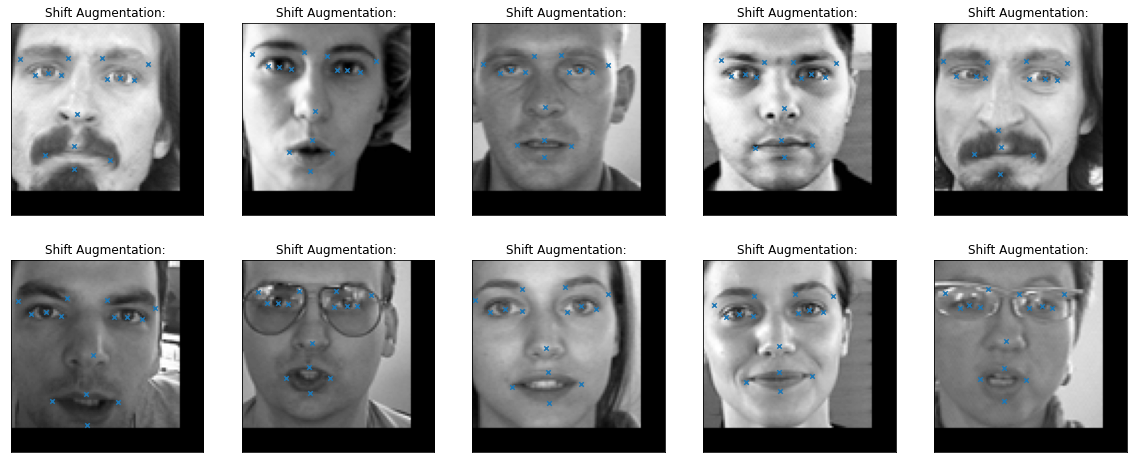

In [76]:
if shift_augmentation:
    print("*********************************************** Pixel Shifted Images *********************************************************")
    fig = plt.figure(figsize=(20,8))
    for i in range(10):
        axis = fig.add_subplot(2, 5, i+1, xticks=[], yticks=[])
        plot_sample(shifted_train_images[i], shifted_train_keypoints[i], axis, "Shift Augmentation: ")
    plt.show()

if shift_augmentation:
    print("*********************************************** Pixel Shifted Images *********************************************************")
    fig = plt.figure(figsize=(20,8))
    for i in range(2141,2151,1):
        axis = fig.add_subplot(2, 5, i-2140, xticks=[], yticks=[])
        plot_sample(shifted_train_images[i], shifted_train_keypoints[i], axis, "Shift Augmentation: ")
    plt.show()